In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pickle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/efefeef/assignment.csv


In [7]:
df=pd.read_csv('/kaggle/input/efefeef/assignment.csv')

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Highly Imbalanced Dataset

In [9]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

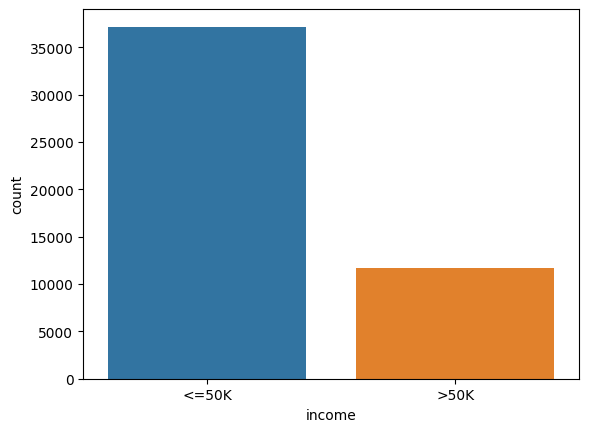

In [10]:
import seaborn as sns
sns.countplot(data=df,x='income')

In [11]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

### Dropping Null Values

In [12]:
df.dropna(axis=0,inplace=True)

### Separating Feature and Target

In [13]:
x=df.drop('income',axis=1)
y=df['income']

### Encoding Columns

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
c=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
for i in c:
    x[i]=le.fit_transform(x[i])

In [15]:
pickle.dump(le,open('lable_encoder.pkl','wb'))

### Train test split

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=10,stratify=y,shuffle=True)

### Upsampling with Smote And Undersampling With Nearmiss

In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
nm=NearMiss(sampling_strategy={0.0:17095})
smote=SMOTE(sampling_strategy={1.0:17095},random_state=10)

In [18]:
train_x_over,train_y_over=smote.fit_resample(train_x,train_y)
train_x_under,train_y_under=nm.fit_resample(train_x,train_y)

# Oversampled Minority Class then  Undersampled majority Class

### Checking Class Frequency after Oversampling

In [19]:
from collections import Counter
Counter(train_y_over)

Counter({0: 27211, 1: 17095})

### Checking Class Frequency after Undersampling

In [20]:
from collections import Counter
Counter(train_y_over)

Counter({0: 27211, 1: 17095})

### Adding Oversampled Feature and target 
### Adding Undersampled Feature and target

In [21]:
train_y_over=pd.DataFrame(train_y_over)
train_y_under=pd.DataFrame(train_y_under)

In [22]:
train_over=pd.concat([train_x_over,train_y_over],axis=1)
train_over.rename(columns={0:'income'},inplace=True)
train_under=pd.concat([train_x_under,train_y_under],axis=1)
train_under.rename(columns={0:'income'},inplace=True)

In [23]:
O_1=train_over.loc[train_over['income']==1]
U_0=train_under.loc[train_under['income']==0]

### Balanced Frequnecy of Classes

In [24]:
print(U_0['income'].value_counts())
print(O_1['income'].value_counts())

income
0    17095
Name: count, dtype: int64
income
1    17095
Name: count, dtype: int64


### Concating Over and Undersampled Data

In [25]:
over_under_sampled=pd.concat([O_1,U_0],axis=0)

In [26]:
over_under_sampled.to_csv('processed_data.csv',index=False)

### New Features and Target

In [27]:
train_x=over_under_sampled.drop('income',axis=1)
train_y=over_under_sampled['income']

In [28]:
train_y.value_counts()

income
1    17095
0    17095
Name: count, dtype: int64

### Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler().set_output(transform="pandas")
train_x=min_max.fit_transform(train_x)
test_x=min_max.fit_transform(test_x)
pickle.dump(min_max,open('min_max_scalar.pkl', 'wb'))

# Fittting Models

In [30]:
from sklearn.metrics import f1_score

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

--------------

### Logestic Regression

In [32]:
lr=LogisticRegression(random_state=10,max_iter=1000,n_jobs=-1)

#######################################
#######################################
lr.fit(train_x,train_y)
predicted_y=lr.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.6151285370815609
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      6803
           1       0.53      0.74      0.62      2242

    accuracy                           0.77      9045
   macro avg       0.71      0.76      0.73      9045
weighted avg       0.81      0.77      0.78      9045



### Random Forest

In [33]:
u=50
i=5
rf=RandomForestClassifier(random_state=10,n_jobs=-1,class_weight='balanced_subsample')


#############################################
#############################################
rf.fit(train_x,train_y)
predicted_y=rf.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.6433566433566433
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      6803
           1       0.56      0.76      0.64      2242

    accuracy                           0.79      9045
   macro avg       0.73      0.78      0.75      9045
weighted avg       0.82      0.79      0.80      9045



### Decision Tree Classifier

In [34]:
dtc=DecisionTreeClassifier(random_state=10)



#######################################
#######################################
dtc.fit(train_x,train_y)
predicted_y=dtc.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.5652711535064476
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      6803
           1       0.47      0.71      0.57      2242

    accuracy                           0.73      9045
   macro avg       0.68      0.72      0.68      9045
weighted avg       0.78      0.73      0.74      9045



### LGBMClassifier

In [35]:
import pickle

In [36]:
lgbm=LGBMClassifier(random_state=10)


#######################################
#######################################
lgbm.fit(train_x,train_y)
predicted_y=lgbm.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))
pickle.dump(lgbm,open('model.pkl', 'wb'))


[LightGBM] [Info] Number of positive: 17095, number of negative: 17095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 34190, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.651542006380716
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      6803
           1       0.54      0.82      0.65      2242

    accuracy                           0.78      9045
   macro avg       0.73      0.80      0.75      9045
weighted avg       0.83      0.78      0.79      9045



### GaussianNB

In [37]:

gnb=GaussianNB()

gnb.fit(train_x,train_y)
predicted_y=gnb.predict(test_x)
f1_score(test_y,predicted_y)
print(classification_report(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6803
           1       0.49      0.38      0.43      2242

    accuracy                           0.75      9045
   macro avg       0.65      0.62      0.63      9045
weighted avg       0.73      0.75      0.74      9045



### GradientBoostingClassifier

In [38]:
gbc=GradientBoostingClassifier(random_state=10)


#######################################
#######################################
gbc.fit(train_x,train_y)
predicted_y=gbc.predict(test_x)
f1_score(test_y,predicted_y)
print(classification_report(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6803
           1       0.55      0.80      0.65      2242

    accuracy                           0.79      9045
   macro avg       0.74      0.79      0.75      9045
weighted avg       0.83      0.79      0.80      9045



### XGBClassifier

In [39]:
xgbc=XGBClassifier(random_state=10,n_estimators=50,n_jobs=-1)


#######################################
#######################################
xgbc.fit(train_x,train_y)
predicted_y=xgbc.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.6465883954398502
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      6803
           1       0.52      0.85      0.65      2242

    accuracy                           0.77      9045
   macro avg       0.73      0.80      0.74      9045
weighted avg       0.83      0.77      0.78      9045



### AdaBoostClassifier

In [40]:
abc=AdaBoostClassifier(random_state=10,n_estimators=50)



#######################################
#######################################
abc.fit(train_x,train_y)
predicted_y=abc.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.6417412673336844
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      6803
           1       0.53      0.82      0.64      2242

    accuracy                           0.77      9045
   macro avg       0.73      0.79      0.74      9045
weighted avg       0.83      0.77      0.79      9045



### KNeighborsClassifier

In [41]:

knc=KNeighborsClassifier(n_jobs=-1)

knc.fit(train_x,train_y)
predicted_y=knc.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.6429404900816802
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6803
           1       0.57      0.74      0.64      2242

    accuracy                           0.80      9045
   macro avg       0.74      0.78      0.75      9045
weighted avg       0.82      0.80      0.80      9045



### BaggingClassifier

In [42]:

bc=BaggingClassifier(random_state=10,n_jobs=-1)

bc.fit(train_x,train_y)
predicted_y=bc.predict(test_x)
print(f1_score(test_y,predicted_y))
print(classification_report(test_y,predicted_y))

0.6312903857450558
              precision    recall  f1-score   support

           0       0.90      0.82      0.85      6803
           1       0.56      0.72      0.63      2242

    accuracy                           0.79      9045
   macro avg       0.73      0.77      0.74      9045
weighted avg       0.81      0.79      0.80      9045

